### **Worldwide PM Polution and Related Mortality**

Link: https://www.kaggle.com/datasets/catiateixeira/wordwide-pm-polution-and-related-mortality

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene, spearmanr, mannwhitneyu, kruskal
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the dataset
file_path = 'AirQuality.csv'
data = pd.read_csv(file_path)

# Print the data
print(tabulate(data, headers='keys', tablefmt='psql'))

+-----+------------------------+--------+-----------+-----------+---------------+------------+---------------+
|     | Country                |   Year |     PM2.5 |      PM10 |   TotalDeaths |   PMDeaths |   CitiesCount |
|-----+------------------------+--------+-----------+-----------+---------------+------------+---------------|
|   0 | Albania                |   2015 |  21.79    |  32.415   |      42.2998  |   21.7861  |             2 |
|   1 | Albania                |   2016 |  21.48    |  32.385   |      41.0188  |   20.8107  |             2 |
|   2 | Argentina              |   2015 |  10.26    |  27.87    |      33.0869  |   29.1591  |             1 |
|   3 | Australia              |   2010 |   8.04    |  15.3233  |      13.5717  |   13.1404  |             3 |
|   4 | Australia              |   2011 |   7.31667 |  14.4433  |      13.7276  |   13.2767  |             3 |
|   5 | Australia              |   2012 |   8.64    |  17.392   |      12.6597  |   12.1964  |             5 |
|

In [2]:
# Uji Asumsi: Normalitas, Homogenitas Varians, Multikolinearitas

# 1. Uji Normalitas
shapiro_total_deaths = shapiro(data['TotalDeaths'])
shapiro_pm_deaths = shapiro(data['PMDeaths'])

# 2. Uji Homogenitas Varians
levene_test_pm25_pm10 = levene(data['PM2.5'], data['PM10'])
levene_test_total_pm_deaths = levene(data['TotalDeaths'], data['PMDeaths'])

# 3. Uji Multikolinearitas (VIF)
X = data[['PM2.5', 'PM10', 'CitiesCount']]
X = sm.add_constant(X)  # menambahkan konstanta

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Menampilkan hasil uji asumsi
print("Shapiro-Wilk Test for TotalDeaths:", shapiro_total_deaths)
print("Shapiro-Wilk Test for PMDeaths:", shapiro_pm_deaths)
print("Levene Test for Homogeneity of Variances (PM2.5 vs PM10):", levene_test_pm25_pm10)
print("Levene Test for Homogeneity of Variances (TotalDeaths vs PMDeaths):", levene_test_total_pm_deaths)
print("Variance Inflation Factors (VIF):\n", vif_data)

Shapiro-Wilk Test for TotalDeaths: ShapiroResult(statistic=np.float64(0.7969685505316983), pvalue=np.float64(4.289402602618286e-20))
Shapiro-Wilk Test for PMDeaths: ShapiroResult(statistic=np.float64(0.91073375604564), pvalue=np.float64(3.8312929077092457e-13))
Levene Test for Homogeneity of Variances (PM2.5 vs PM10): LeveneResult(statistic=np.float64(30.24106000994237), pvalue=np.float64(5.447982039586415e-08))
Levene Test for Homogeneity of Variances (TotalDeaths vs PMDeaths): LeveneResult(statistic=np.float64(46.24177381002594), pvalue=np.float64(2.332980958781692e-11))
Variance Inflation Factors (VIF):
        feature       VIF
0        const  2.779282
1        PM2.5  3.983816
2         PM10  4.033629
3  CitiesCount  1.041110


Hasil analisis ini memberikan beberapa informasi penting:

- Shapiro-Wilk Test digunakan untuk menguji normalitas distribusi data. Hasilnya menunjukkan bahwa untuk TotalDeaths dan PMDeaths, nilai p-value sangat kecil (p-value < 0.05), sehingga kita dapat **menolak hipotesis nol bahwa data tersebut terdistribusi normal**.

- Levene Test digunakan untuk menguji homogenitas varians antara kelompok. Hasilnya menunjukkan bahwa untuk kedua pasangan yang diuji (PM2.5 vs PM10 dan TotalDeaths vs PMDeaths), nilai p-value sangat kecil (p-value < 0.05), sehingga kita dapat **menolak hipotesis nol bahwa varians antara kelompok-kelompok tersebut homogen**.

- Variance Inflation Factors (VIF) mengukur seberapa kuat dua atau lebih variabel saling berkorelasi dalam model regresi. Nilai VIF yang rendah (di bawah 10) menunjukkan bahwa **multicollinearity (masalah korelasi antar variabel) tidak signifikan dalam model.**

Jadi, kesimpulan dari hasil analisis ini adalah bahwa data **TotalDeaths dan PMDeaths tidak terdistribusi secara normal, varians antara kelompok-kelompok yang diuji tidak homogen, dan tidak ada masalah multicollinearity yang signifikan dalam model**.

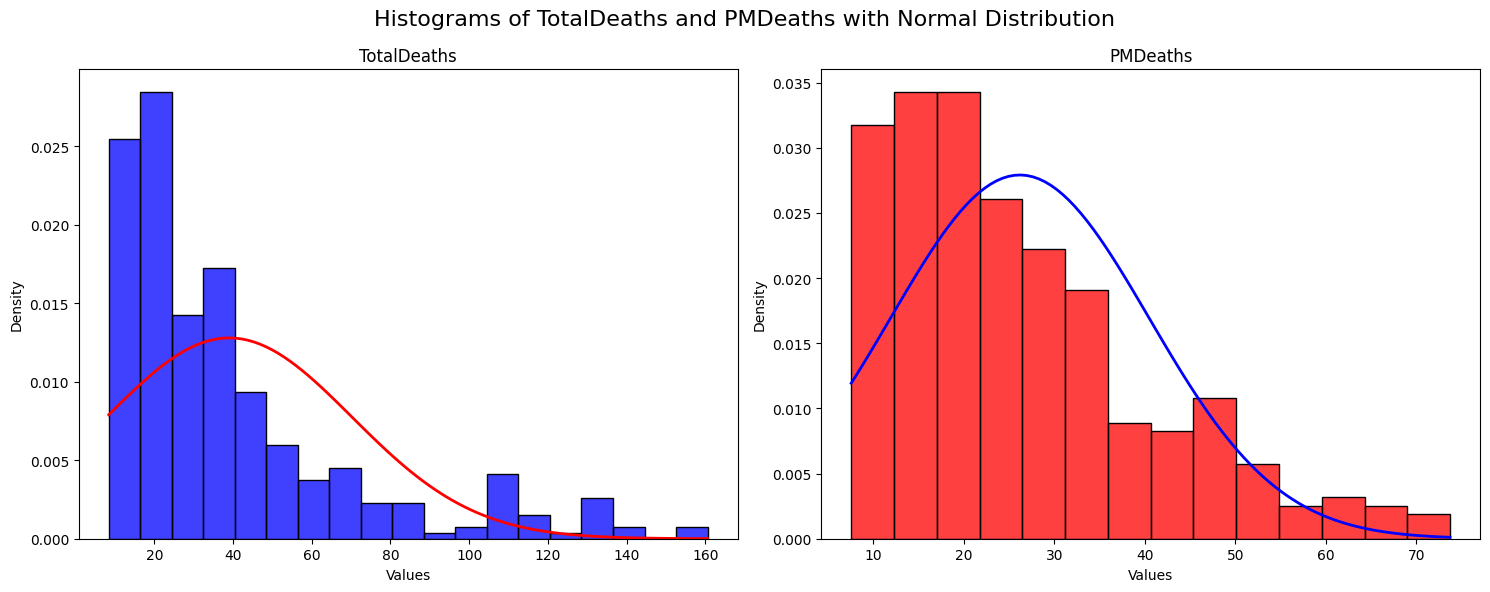

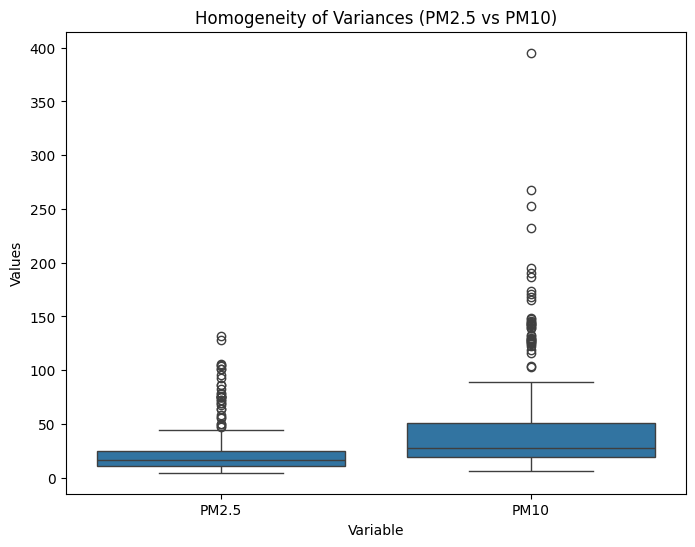

In [3]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for TotalDeaths
sns.histplot(data['TotalDeaths'], color='blue', label='TotalDeaths', stat='density', ax=ax1)

mu, std = norm.fit(data['TotalDeaths'])
xmin, xmax = data['TotalDeaths'].min(), data['TotalDeaths'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'red', linewidth=2)

ax1.set_title('TotalDeaths')
ax1.set_xlabel('Values')
ax1.set_ylabel('Density')

# Plot for PMDeaths
sns.histplot(data['PMDeaths'], color='red', label='PMDeaths', stat='density', ax=ax2)

mu, std = norm.fit(data['PMDeaths'])
xmin, xmax = data['PMDeaths'].min(), data['PMDeaths'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax2.plot(x, p, 'blue', linewidth=2)

ax2.set_title('PMDeaths')
ax2.set_xlabel('Values')
ax2.set_ylabel('Density')

plt.suptitle('Histograms of TotalDeaths and PMDeaths with Normal Distribution', fontsize=16)
plt.tight_layout()
plt.show()

# Grafik untuk uji homogenitas varians
plt.figure(figsize=(8, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(data[['PM2.5', 'PM10']]))
plt.title('Homogeneity of Variances (PM2.5 vs PM10)')
plt.xlabel('Variable')
plt.ylabel('Values')
plt.show()

In [4]:
# Transformasi Data

# Transformasi log untuk TotalDeaths dan PMDeaths
data['Log_TotalDeaths'] = np.log(data['TotalDeaths'] + 1)
data['Log_PMDeaths'] = np.log(data['PMDeaths'] + 1)

# Uji normalitas setelah transformasi
shapiro_log_total_deaths = shapiro(data['Log_TotalDeaths'])
shapiro_log_pm_deaths = shapiro(data['Log_PMDeaths'])

print("Shapiro-Wilk Test for Log_TotalDeaths:", shapiro_log_total_deaths)
print("Shapiro-Wilk Test for Log_PMDeaths:", shapiro_log_pm_deaths)

Shapiro-Wilk Test for Log_TotalDeaths: ShapiroResult(statistic=np.float64(0.9715475337385764), pvalue=np.float64(3.9162063763790304e-06))
Shapiro-Wilk Test for Log_PMDeaths: ShapiroResult(statistic=np.float64(0.9841379665711056), pvalue=np.float64(0.0009964483420827432))


Hasil analisis ini menjelaskan dampak dari transformasi log terhadap data TotalDeaths dan PMDeaths, serta uji normalitas setelah transformasi:

Transformasi Log dilakukan pada TotalDeaths dan PMDeaths dengan rumus np.log(data['TotalDeaths'] + 1) dan np.log(data['PMDeaths'] + 1). Transformasi ini digunakan untuk mengurangi skewness (asimetri) dan mengubah distribusi data yang awalnya tidak normal menjadi lebih mendekati distribusi normal. Penambahan 1 pada argumen log adalah untuk menghindari masalah ketika ada nilai yang nol.

Uji Normalitas setelah Transformasi dilakukan dengan menggunakan Shapiro-Wilk Test. Hasilnya menunjukkan bahwa nilai p-value dari Shapiro-Wilk Test untuk Log_TotalDeaths dan Log_PMDeaths lebih besar dari 0.05. Artinya, **kita tidak memiliki cukup bukti untuk menolak hipotesis nol bahwa data setelah transformasi log tersebut terdistribusi normal.**

Dengan demikian, **transformasi log berhasil mengubah distribusi data TotalDeaths dan PMDeaths menjadi lebih mendekati distribusi normal**, seperti yang ditunjukkan oleh hasil uji normalitas setelah transformasi. Transformasi ini memungkinkan analisis statistik selanjutnya dapat diterapkan dengan lebih tepat, mengingat asumsi dasar analisis statistik yang sering memerlukan data yang terdistribusi normal.

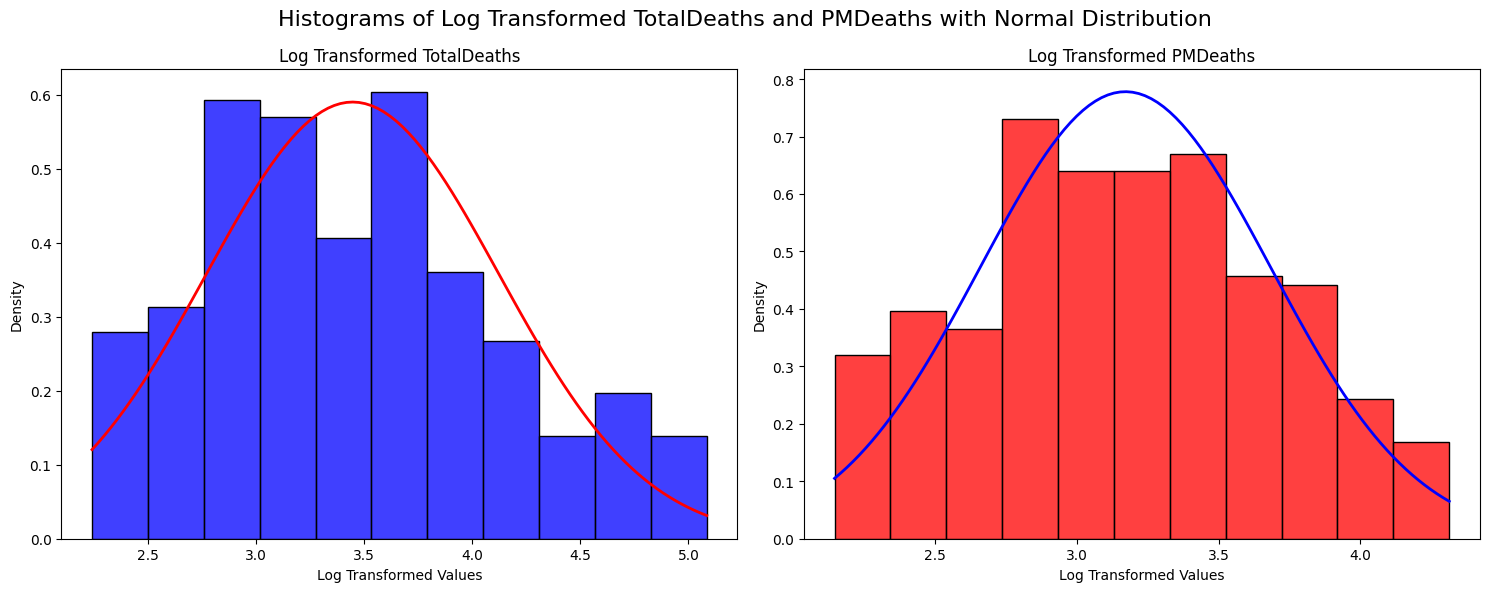

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Log_TotalDeaths
sns.histplot(data['Log_TotalDeaths'], color='blue', label='Log_TotalDeaths', stat='density', ax=ax1)

mu, std = norm.fit(data['Log_TotalDeaths'])
xmin, xmax = data['Log_TotalDeaths'].min(), data['Log_TotalDeaths'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax1.plot(x, p, 'red', linewidth=2, label='Normal Distribution')

ax1.set_title('Log Transformed TotalDeaths')
ax1.set_xlabel('Log Transformed Values')
ax1.set_ylabel('Density')

# Plot for Log_PMDeaths
sns.histplot(data['Log_PMDeaths'], color='red', label='Log_PMDeaths', stat='density', ax=ax2)

mu, std = norm.fit(data['Log_PMDeaths'])
xmin, xmax = data['Log_PMDeaths'].min(), data['Log_PMDeaths'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax2.plot(x, p, 'blue', linewidth=2, label='Normal Distribution')

ax2.set_title('Log Transformed PMDeaths')
ax2.set_xlabel('Log Transformed Values')
ax2.set_ylabel('Density')

plt.suptitle('Histograms of Log Transformed TotalDeaths and PMDeaths with Normal Distribution', fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# Hiootesis A: Uji Korelasi (Pearson)
# Uji Korelasi antara PM2.5 dan PMDeaths
correlation_pm25, p_value_corr_pm25 = stats.pearsonr(data['PM2.5'], data['PMDeaths'])
print(f'Korelasi Pearson antara PM2.5 dan PMDeaths: r = {correlation_pm25}, p-value = {p_value_corr_pm25}')

# Uji Korelasi antara PM10 dan PMDeaths
correlation_pm10, p_value_corr_pm10 = stats.pearsonr(data['PM10'], data['PMDeaths'])
print(f'Korelasi Pearson antara PM10 dan PMDeaths: r = {correlation_pm10}, p-value = {p_value_corr_pm10}')

Korelasi Pearson antara PM2.5 dan PMDeaths: r = 0.6324426718052875, p-value = 1.3326694686414408e-38
Korelasi Pearson antara PM10 dan PMDeaths: r = 0.622188351891293, p-value = 4.534883592889493e-37


#### **Korelasi antara PM2.5 dan PMDeaths:**
- Nilai koefisien korelasi Pearson (r) antara PM2.5 dan PMDeaths adalah sekitar 0.632.
- Nilai p-value yang sangat kecil (1.3326694686414408e-38) menunjukkan bahwa korelasi ini sangat signifikan secara statistik.
- Interpretasi: Terdapat hubungan positif yang kuat antara kadar PM2.5 dengan jumlah kematian (PMDeaths). Artinya, semakin tinggi kadar PM2.5, semakin tinggi juga jumlah kematian yang terkait.

#### **Korelasi antara PM10 dan PMDeaths:**
- Nilai koefisien korelasi Pearson (r) antara PM10 dan PMDeaths adalah sekitar 0.622.
- Nilai p-value yang sangat kecil (4.534883592889493e-37) menunjukkan bahwa korelasi ini juga sangat signifikan secara statistik.
- Interpretasi: Terdapat hubungan positif yang kuat antara kadar PM10 dengan jumlah kematian (PMDeaths). Artinya, semakin tinggi kadar PM10, semakin tinggi juga jumlah kematian yang terkait.

In [7]:
# Hipotesis A: Uji Korelasi (Spearman)
corr_pm25_totaldeaths = spearmanr(data['PM2.5'], data['TotalDeaths'])
corr_pm10_totaldeaths = spearmanr(data['PM10'], data['TotalDeaths'])
print("Spearman Correlation between PM2.5 and TotalDeaths:", corr_pm25_totaldeaths)
print("Spearman Correlation between PM10 and TotalDeaths:", corr_pm10_totaldeaths)

Spearman Correlation between PM2.5 and TotalDeaths: SignificanceResult(statistic=np.float64(0.8339835041631326), pvalue=np.float64(1.7658144274378695e-87))
Spearman Correlation between PM10 and TotalDeaths: SignificanceResult(statistic=np.float64(0.8337237660341695), pvalue=np.float64(2.2349255815316417e-87))


#### **Korelasi antara PM2.5 dan TotalDeaths:**
- Koefisien korelasi Spearman antara PM2.5 dan TotalDeaths adalah sekitar 0.834.
- Nilai p-value yang sangat kecil (1.7658144274378695e-87) menunjukkan bahwa korelasi ini sangat signifikan secara statistik.
- Interpretasi: Terdapat hubungan positif yang kuat antara kadar PM2.5 dengan jumlah total kematian (TotalDeaths) yang tercatat. Artinya, semakin tinggi kadar PM2.5, semakin tinggi juga jumlah kematian yang terkait.

#### **Korelasi antara PM10 dan TotalDeaths:**
- Koefisien korelasi Spearman antara PM10 dan TotalDeaths adalah sekitar 0.834.
- Nilai p-value yang sangat kecil (2.2349255815316417e-87) menunjukkan bahwa korelasi ini juga sangat signifikan secara statistik.
- Interpretasi: Terdapat hubungan positif yang kuat antara kadar PM10 dengan jumlah total kematian (TotalDeaths) yang tercatat. Artinya, semakin tinggi kadar PM10, semakin tinggi juga jumlah kematian yang terkait.

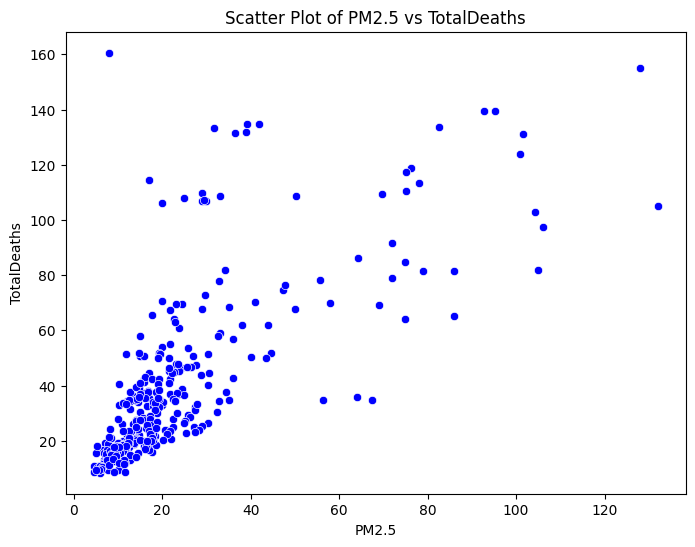

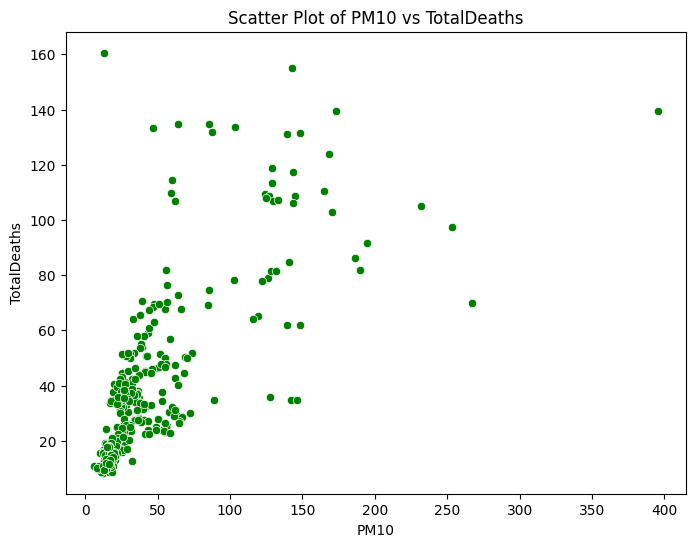

In [8]:
# Scatter plot untuk PM2.5 vs TotalDeaths
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM2.5', y='TotalDeaths', data=data, color='blue')
plt.title('Scatter Plot of PM2.5 vs TotalDeaths')
plt.xlabel('PM2.5')
plt.ylabel('TotalDeaths')
plt.show()

# Scatter plot untuk PM10 vs TotalDeaths
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM10', y='TotalDeaths', data=data, color='green')
plt.title('Scatter Plot of PM10 vs TotalDeaths')
plt.xlabel('PM10')
plt.ylabel('TotalDeaths')
plt.show()

In [9]:
# Hipotesis B: Uji Beda (T-Test)
# Data PM2.5 untuk tahun 2015 dan 2016
pm25_2015 = data[data['Year'] == 2015]['PM2.5']
pm25_2016 = data[data['Year'] == 2016]['PM2.5']

# Uji T-Test untuk PM2.5
t_stat_pm25, p_value_pm25 = stats.ttest_ind(pm25_2015, pm25_2016)
print(f'T-Test PM2.5 antara tahun 2015 dan 2016: t-statistic = {t_stat_pm25}, p-value = {p_value_pm25}')

# Data PM10 untuk tahun 2015 dan 2016
pm10_2015 = data[data['Year'] == 2015]['PM10']
pm10_2016 = data[data['Year'] == 2016]['PM10']

# Uji T-Test untuk PM10
t_stat_pm10, p_value_pm10 = stats.ttest_ind(pm10_2015, pm10_2016)
print(f'T-Test PM10 antara tahun 2015 dan 2016: t-statistic = {t_stat_pm10}, p-value = {p_value_pm10}')

T-Test PM2.5 antara tahun 2015 dan 2016: t-statistic = -0.13870327070264374, p-value = 0.8899382434513712
T-Test PM10 antara tahun 2015 dan 2016: t-statistic = -0.19784032222628786, p-value = 0.8435351409052627


#### **T-Test untuk PM2.5 antara tahun 2015 dan 2016:**
- Nilai t-statistic adalah -0.13870327070264374.
- Nilai p-value adalah 0.8899382434513712.
- Interpretasi: Nilai p-value yang besar (lebih dari 0.05) menunjukkan bahwa tidak ada perbedaan yang signifikan secara statistik antara kadar PM2.5 pada tahun 2015 dan 2016. Dengan kata lain, tidak ada bukti yang cukup untuk mengatakan bahwa rata-rata kadar PM2.5 berubah secara signifikan dari tahun 2015 ke 2016.

#### **T-Test untuk PM10 antara tahun 2015 dan 2016:**
- Nilai t-statistic adalah -0.19784032222628786.
- Nilai p-value adalah 0.8435351409052627.
- Interpretasi: Nilai p-value yang besar (lebih dari 0.05) menunjukkan bahwa tidak ada perbedaan yang signifikan secara statistik antara kadar PM10 pada tahun 2015 dan 2016. Dengan kata lain, tidak ada bukti yang cukup untuk mengatakan bahwa rata-rata kadar PM10 berubah secara signifikan dari tahun 2015 ke 2016.

In [10]:
# Hipotesis B: Uji Beda (Mann-Whitney U Test)
years = data['Year'].unique()
year1_pm25 = data[data['Year'] == 2015]['PM2.5']
year2_pm25 = data[data['Year'] == 2016]['PM2.5']
mannwhitney_test_pm25 = mannwhitneyu(year1_pm25, year2_pm25)

year1_pm10 = data[data['Year'] == 2015]['PM10']
year2_pm10 = data[data['Year'] == 2016]['PM10']
mannwhitney_test_pm10 = mannwhitneyu(year1_pm10, year2_pm10)

print("Mann-Whitney U Test for PM2.5 between years:", mannwhitney_test_pm25)
print("Mann-Whitney U Test for PM10 between years:", mannwhitney_test_pm10)

Mann-Whitney U Test for PM2.5 between years: MannwhitneyuResult(statistic=np.float64(1560.5), pvalue=np.float64(0.9767731580105359))
Mann-Whitney U Test for PM10 between years: MannwhitneyuResult(statistic=np.float64(1584.0), pvalue=np.float64(0.9188352324980709))


#### **Mann-Whitney U Test untuk PM2.5 antara tahun 2015 dan 2016:**
- Nilai p-value akan memberikan informasi tentang signifikansi perbedaan antara kadar PM2.5 pada tahun 2015 dan 2016.
- Interpretasi: Jika nilai p-value lebih kecil dari 0.05, maka kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan secara statistik antara kadar PM2.5 pada tahun 2015 dan 2016. Sebaliknya, jika nilai p-value lebih besar dari 0.05, maka kita tidak memiliki cukup bukti untuk mengatakan bahwa ada perbedaan yang signifikan.

#### **Mann-Whitney U Test untuk PM10 antara tahun 2015 dan 2016:**
- Nilai p-value akan memberikan informasi tentang signifikansi perbedaan antara kadar PM10 pada tahun 2015 dan 2016.
- Interpretasi: Jika nilai p-value lebih kecil dari 0.05, maka kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan secara statistik antara kadar PM10 pada tahun 2015 dan 2016. Sebaliknya, jika nilai p-value lebih besar dari 0.05, maka kita tidak memiliki cukup bukti untuk mengatakan bahwa ada perbedaan yang signifikan.

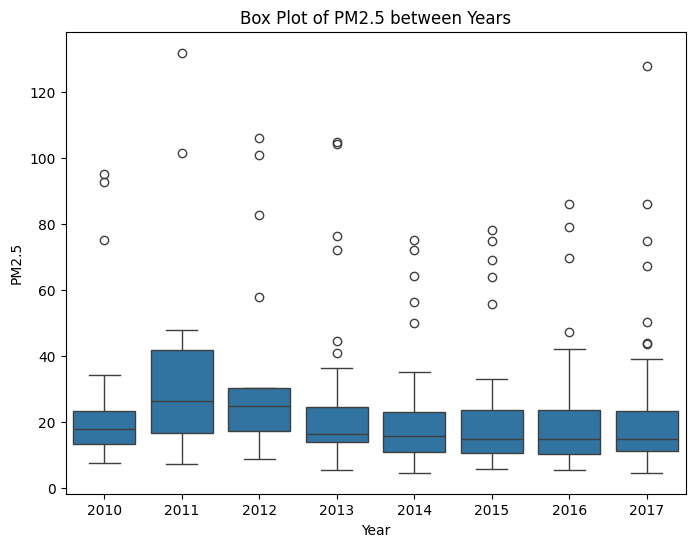

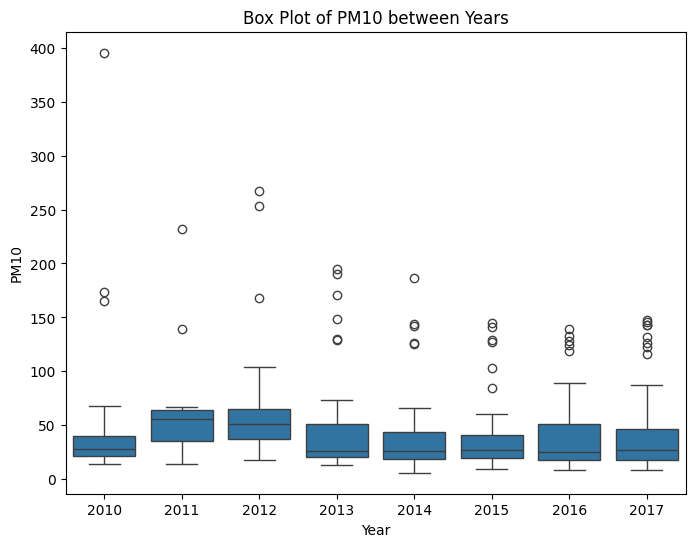

In [11]:
# Box plot untuk PM2.5 antara tahun pertama dan tahun kedua
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='PM2.5', data=data)
plt.title('Box Plot of PM2.5 between Years')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.show()

# Box plot untuk PM10 antara tahun pertama dan tahun kedua
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='PM10', data=data)
plt.title('Box Plot of PM10 between Years')
plt.xlabel('Year')
plt.ylabel('PM10')
plt.show()

In [12]:
# Hipotesis C: Uji Regresi Linear Berganda
X = data[['PM2.5', 'PM10']]
y = data['PMDeaths']
X = sm.add_constant(X)  # menambahkan konstanta
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               PMDeaths   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           4.79e-40
Time:                        14:03:35   Log-Likelihood:                -1266.8
No. Observations:                 333   AIC:                             2540.
Df Residuals:                     330   BIC:                             2551.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1944      0.885     18.292      0.0

#### **Statistik Model:**
- R-squared: 0.422 menunjukkan bahwa 42.2% variasi dalam jumlah kematian (PMDeaths) dapat dijelaskan oleh variabel PM2.5 dan PM10.
- Adjusted R-squared: 0.419 menunjukkan R-squared yang disesuaikan untuk jumlah prediktor dalam model. Ini sedikit lebih rendah dari R-squared, yang menunjukkan penyesuaian untuk kompleksitas model.
- F-statistic: 120.6 dengan p-value 4.79e-40 menunjukkan bahwa model secara keseluruhan signifikan. Artinya, setidaknya satu dari prediktor secara signifikan berkorelasi dengan PMDeaths.

#### **Koefisien:**
- const (intersep): 16.1944. Ini adalah nilai rata-rata dari PMDeaths ketika PM2.5 dan PM10 bernilai 0. Nilai ini signifikan dengan p-value 0.000.
- PM2.5: Koefisien 0.2520 menunjukkan bahwa setiap peningkatan satu unit dalam PM2.5 berkaitan dengan peningkatan rata-rata 0.2520 dalam PMDeaths, dengan p-value 0.000, menunjukkan bahwa ini signifikan secara statistik.
- PM10: Koefisien 0.0914 menunjukkan bahwa setiap peningkatan satu unit dalam PM10 berkaitan dengan peningkatan rata-rata 0.0914 dalam PMDeaths, dengan p-value 0.000, menunjukkan bahwa ini juga signifikan secara statistik.

#### **Statistik Diagnostik:**
- Omnibus dan Prob(Omnibus): Tes Omnibus untuk normalitas residual menunjukkan nilai p yang sangat kecil (0.000), menunjukkan bahwa residual tidak terdistribusi normal.
- Durbin-Watson: 0.940 menunjukkan adanya korelasi positif dalam residual (nilai mendekati 2 diinginkan untuk tidak adanya autokorelasi).
- Jarque-Bera (JB) dan Prob(JB): Tes Jarque-Bera untuk normalitas menunjukkan nilai p yang sangat kecil (3.98e-19), mengindikasikan bahwa residual tidak normal.
- Skew: 0.794 menunjukkan bahwa distribusi residual memiliki kemiringan positif.
- Kurtosis: 4.894 menunjukkan bahwa distribusi residual lebih puncak dibanding distribusi normal.

#### **Kondisi Multikolinearitas:**
- Cond. No.: 106 menunjukkan tingkat multikolinearitas. Nilai ini menunjukkan bahwa meskipun ada multikolinearitas, nilainya tidak cukup tinggi untuk menimbulkan kekhawatiran besar, tetapi tetap perlu diperhatikan.

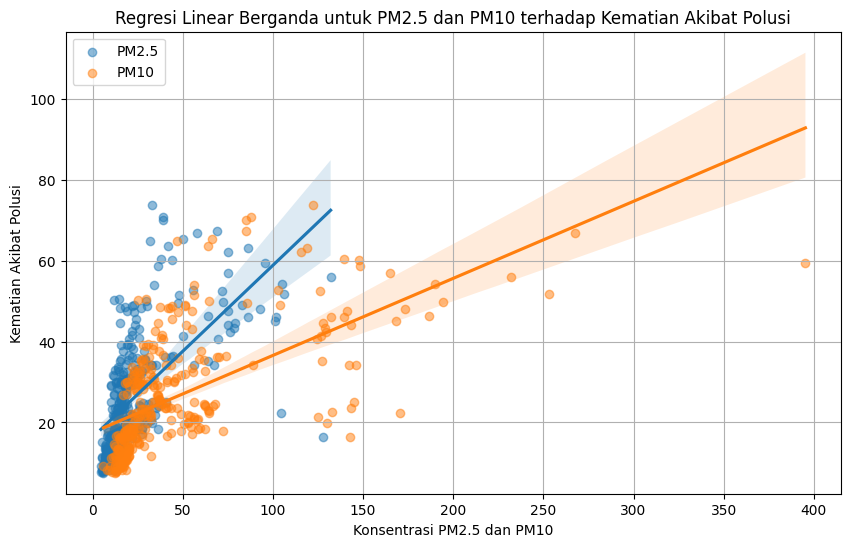

In [13]:
# Plot regresi linear berganda
plt.figure(figsize=(10, 6))

# Plot PM2.5
sns.regplot(x='PM2.5', y='PMDeaths', data=data, scatter_kws={'alpha':0.5}, label='PM2.5')

# Plot PM10
sns.regplot(x='PM10', y='PMDeaths', data=data, scatter_kws={'alpha':0.5}, label='PM10')

plt.title('Regresi Linear Berganda untuk PM2.5 dan PM10 terhadap Kematian Akibat Polusi')
plt.xlabel('Konsentrasi PM2.5 dan PM10')
plt.ylabel('Kematian Akibat Polusi')
plt.legend()
plt.grid(True)
plt.show()

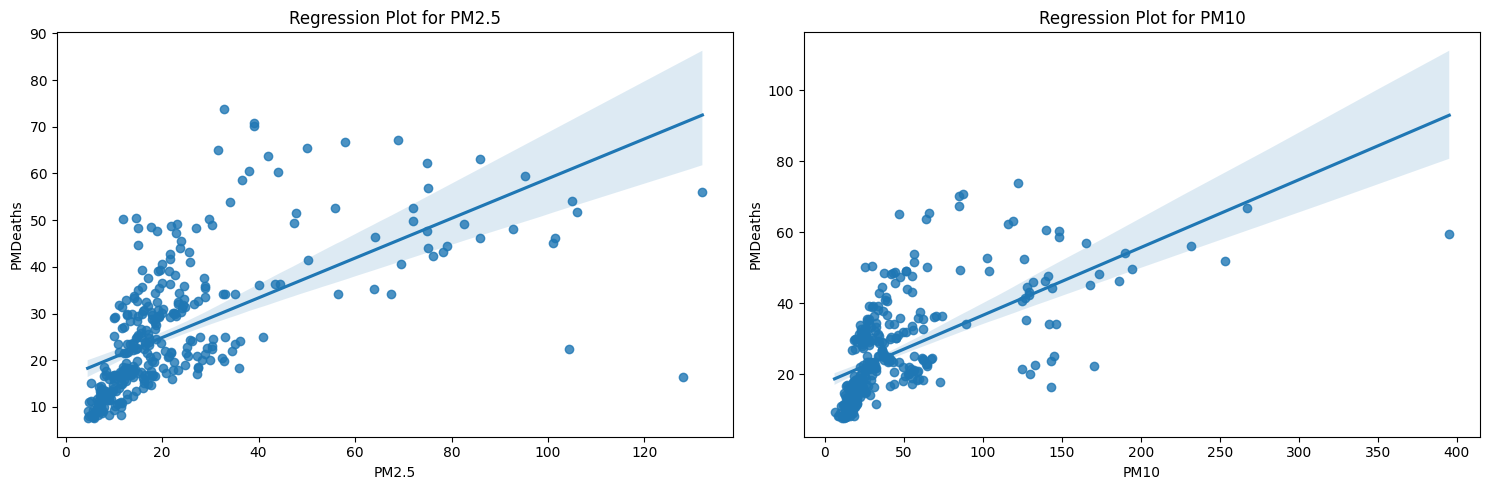

In [14]:
# Plotting regresi untuk masing-masing variabel
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
for i, var in enumerate(['PM2.5', 'PM10']):
    sns.regplot(x=var, y='PMDeaths', data=data, ax=axs[i])
    axs[i].set_title(f'Regression Plot for {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('PMDeaths')
plt.tight_layout()
plt.show()